In [1]:
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt

# FERC714

In [ ]:
ferc714 = pd.read_csv('../Data/GridInputData/Form-714-2022/Part 2 Schedule 6 - Balancing Authority Hourly System Lambda.csv')
ferc714 = ferc714.loc[:, ['respondent_id', 'lambda_date', 'timezone']+['hour0'+str(i) for i in np.arange(1, 10)]+['hour'+str(i) for i in np.arange(10, 25)]].fillna(0)
ferc714['report_yr'] = pd.to_datetime(ferc714['lambda_date']).dt.year
# ferc714.head()

In [ ]:
ferc714_ids = pd.read_csv('../Data/GridInputData/Form-714-2022/2022 Respondent IDs status.csv')
# ferc714_ids[ferc714_ids['nerc']=='WECC']


In [6]:
df = ferc714.copy(deep=True)
df_ids = ferc714_ids.copy(deep=True)
nerc_region = 'WECC'#self.nerc
year = 2022#self.year
df_ids_bas = list(df_ids[df_ids.nerc == nerc_region].respondent_id.values)
#aggregate the price data by mean price per hour for any balancing authorities within the nerc region
df_bas = df[df.respondent_id.isin(df_ids_bas) & (df.report_yr==year)][['lambda_date', 'respondent_id', 'hour01', 'hour02', 'hour03', 'hour04', 'hour05', 'hour06', 'hour07', 'hour08', 'hour09', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23', 'hour24']]
df_bas.drop(['respondent_id'], axis=1, inplace=True)
df_bas.columns = ['date',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
df_bas_temp = pandas.melt(df_bas, id_vars=['date'])
# df_bas_temp.date = df_bas_temp.date.str[0:-7] + (df_bas_temp.variable - 1).astype(str) + ':00'
df_bas_temp['time'] = (df_bas_temp.variable - 1).astype(str)  + ':00'
df_bas_temp['datetime'] = pandas.to_datetime(df_bas_temp.date + ' ' +df_bas_temp['time'])
df_bas_temp.drop(columns=['date', 'variable', 'time'], inplace=True)
df_bas_temp['value'] = df_bas_temp['value'].astype(float)
#aggregate by datetime
df_bas_temp = df_bas_temp.groupby('datetime', as_index=False).max()
df_bas_temp.columns = ['datetime', 'price']        


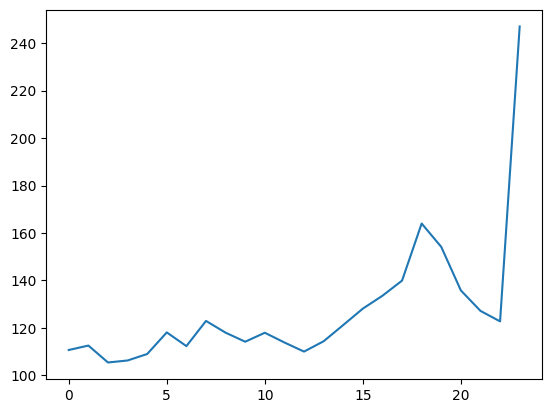

In [10]:
plt.plot(df_bas_temp['price'].values.reshape(-1, 24).mean(axis=0))

# CEMS

- Yearly to Monthly

In [ ]:
old_example = pd.read_csv('../Data/GridInputData/2019az01.csv')
new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-az.csv')

In [14]:
old_example.columns

Index(['STATE', 'FACILITY_NAME', 'ORISPL_CODE', 'UNITID', 'OP_DATE', 'OP_HOUR',
       'OP_TIME', 'GLOAD (MW)', 'SLOAD (1000lb/hr)', 'SO2_MASS (lbs)',
       'SO2_MASS_MEASURE_FLG', 'SO2_RATE (lbs/mmBtu)', 'SO2_RATE_MEASURE_FLG',
       'NOX_RATE (lbs/mmBtu)', 'NOX_RATE_MEASURE_FLG', 'NOX_MASS (lbs)',
       'NOX_MASS_MEASURE_FLG', 'CO2_MASS (tons)', 'CO2_MASS_MEASURE_FLG',
       'CO2_RATE (tons/mmBtu)', 'CO2_RATE_MEASURE_FLG', 'HEAT_INPUT (mmBtu)',
       'FAC_ID', 'UNIT_ID'],
      dtype='object')

In [13]:
new.columns

Index(['State', 'Facility Name', 'Facility ID', 'Unit ID', 'Associated Stacks',
       'Date', 'Hour', 'Operating Time', 'Gross Load (MW)',
       'Steam Load (1000 lb/hr)', 'SO2 Mass (lbs)',
       'SO2 Mass Measure Indicator', 'SO2 Rate (lbs/mmBtu)',
       'SO2 Rate Measure Indicator', 'CO2 Mass (short tons)',
       'CO2 Mass Measure Indicator', 'CO2 Rate (short tons/mmBtu)',
       'CO2 Rate Measure Indicator', 'NOx Mass (lbs)',
       'NOx Mass Measure Indicator', 'NOx Rate (lbs/mmBtu)',
       'NOx Rate Measure Indicator', 'Heat Input (mmBtu)',
       'Heat Input Measure Indicator', 'Primary Fuel Type',
       'Secondary Fuel Type', 'Unit Type', 'SO2 Controls', 'NOx Controls',
       'PM Controls', 'Hg Controls', 'Program Code'],
      dtype='object')

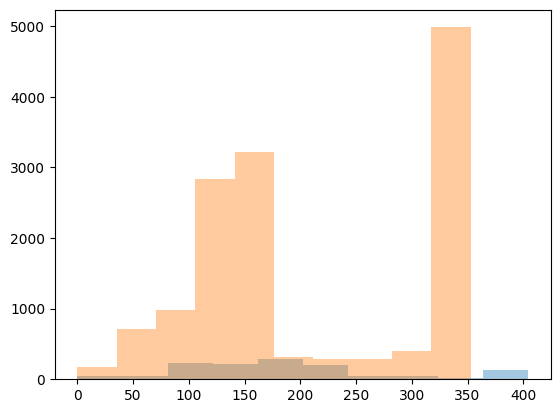

In [22]:
plt.hist(old_example.loc[old_example['FACILITY_NAME']=='Cholla']['CO2_MASS (tons)'], alpha=0.4)
plt.hist(new.loc[new['Facility Name']=='Cholla']['CO2 Mass (short tons)'], alpha=0.4)
plt.show()

### column names to fix: (which are used in the model?)
- 'ORISPL_CODE' <- 'Facility ID'
- 'UNITID' <- 'Unit ID'
- 'OP_DATE' <- 'Date'
- 'OP_HOUR' <- 'Hour'
- 'GLOAD (MW)' <- 'Gross Load (MW)'
- 'SO2_MASS (lbs)' <- 'SO2 Mass (lbs)'
- 'NOX_MASS (lbs)' <- 'NOx Mass (lbs)'
- 'CO2_MASS (tons)' <- 'CO2 Mass (short tons)'
- 'HEAT_INPUT (mmBtu)' <- 'Heat Input (mmBtu)'

In [40]:
month_name = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
for state in ['tx', 'ca', 'ut', 'nm', 'wy', 'co', 'wa', 'az', 'mt', 'id']:
    print(state)
    new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')
    new = new.rename(columns={'Facility ID':'ORISPL_CODE',
                              'Unit ID':'UNITID',
                              'Date':'OP_DATE',
                              'Hour':'OP_HOUR', 
                              'Gross Load (MW)':'GLOAD (MW)',
                              'SO2 Mass (lbs)':'SO2_MASS (lbs)',
                              'NOx Mass (lbs)':'NOX_MASS (lbs)',
                              'CO2 Mass (short tons)':'CO2_MASS (tons)',
                              'Heat Input (mmBtu)':'HEAT_INPUT (mmBtu)'})
    new['OP_DATE'] = pd.to_datetime(new['OP_DATE']).dt.strftime('%m-%d-%Y') # switch to old format
    new['month'] = pd.to_datetime(new['OP_DATE']).dt.month
    for month in np.arange(1, 13):
        tmp = new[new['month']==month].copy().reset_index(drop=True)
        tmp.to_csv('../Data/GridInputData/2022Final/CEMS/2022/2022'+state+month_name[month]+'.csv', index=None)

tx


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,4,11,13,15,17,25,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


ca


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,4,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


ut


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


nm


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


wy


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,25,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


co


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,4,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


wa


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


az


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


mt


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (4,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


id


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_77070/2449379226.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


In [2]:
month_name = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
for state in ['or']:#, 'ca', 'ut', 'nm', 'wy', 'co', 'wa', 'az', 'mt', 'id']:
    print(state)
    new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')
    new = new.rename(columns={'Facility ID':'ORISPL_CODE',
                              'Unit ID':'UNITID',
                              'Date':'OP_DATE',
                              'Hour':'OP_HOUR', 
                              'Gross Load (MW)':'GLOAD (MW)',
                              'SO2 Mass (lbs)':'SO2_MASS (lbs)',
                              'NOx Mass (lbs)':'NOX_MASS (lbs)',
                              'CO2 Mass (short tons)':'CO2_MASS (tons)',
                              'Heat Input (mmBtu)':'HEAT_INPUT (mmBtu)'})
    new['OP_DATE'] = pd.to_datetime(new['OP_DATE']).dt.strftime('%m-%d-%Y') # switch to old format
    new['month'] = pd.to_datetime(new['OP_DATE']).dt.month
    for month in np.arange(1, 13):
        tmp = new[new['month']==month].copy().reset_index(drop=True)
        tmp.to_csv('../Data/GridInputData/2022Final/CEMS/2022/2022'+state+month_name[month]+'.csv', index=None)

or


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_1369/860225641.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')


In [5]:
month_name = {1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'}
for state in ['nv']:#, 'ca', 'ut', 'nm', 'wy', 'co', 'wa', 'az', 'mt', 'id']:
    print(state)
    new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')
    new = new.rename(columns={'Facility ID':'ORISPL_CODE',
                              'Unit ID':'UNITID',
                              'Date':'OP_DATE',
                              'Hour':'OP_HOUR', 
                              'Gross Load (MW)':'GLOAD (MW)',
                              'SO2 Mass (lbs)':'SO2_MASS (lbs)',
                              'NOx Mass (lbs)':'NOX_MASS (lbs)',
                              'CO2 Mass (short tons)':'CO2_MASS (tons)',
                              'Heat Input (mmBtu)':'HEAT_INPUT (mmBtu)'})
    new['OP_DATE'] = pd.to_datetime(new['OP_DATE']).dt.strftime('%m-%d-%Y') # switch to old format
    new['month'] = pd.to_datetime(new['OP_DATE']).dt.month
    for month in np.arange(1, 13):
        tmp = new[new['month']==month].copy().reset_index(drop=True)
        tmp.to_csv('../Data/GridInputData/2022Final/CEMS/2022/2022'+state+month_name[month]+'.csv', index=None)

nv


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_1369/1119738149.py:4: DtypeWarning: Columns (3,4,25,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  new = pd.read_csv('../Data/GridInputData/2022Final/CEMS/emissions-hourly-2022-'+state+'.csv')
